In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
# Use sklearn.datasets to create some data - 1000 samples, 4 clusters in blobs
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

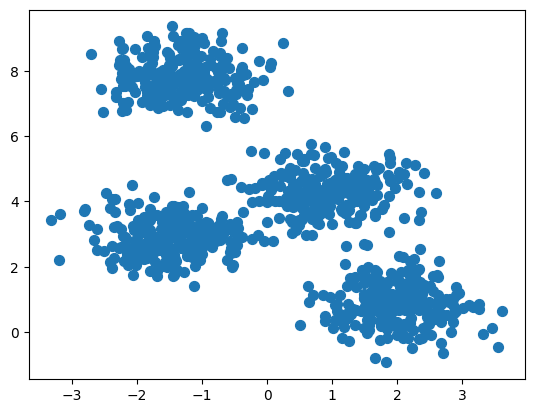

In [13]:
# plot the data
# this illustrates how sklearn creates the blobs we requested
plt.scatter(X[:, 0], X[:, 1], s=50)

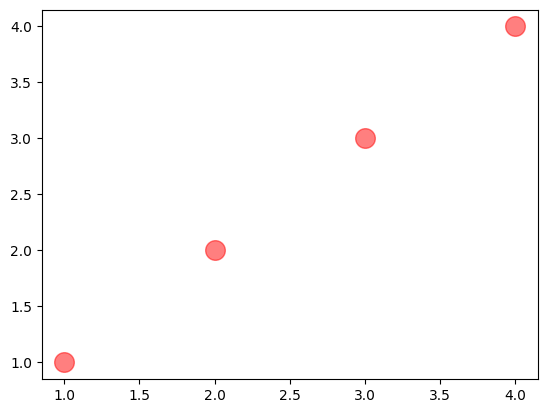

In [17]:
# Initialize any centroids in python
centroids = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

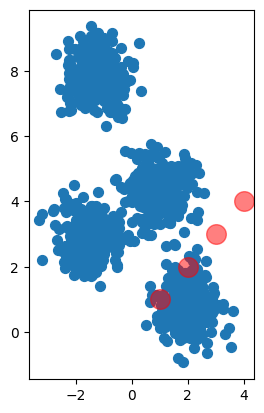

In [18]:
# plot the centroids on the blobs
# this illustrates how we initialize the centroids
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.scatter(X[:, 0], X[:, 1], s=50)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [28]:
# we create an array of zeros to store the distances
# the array has the same number of rows as the number of datapoints
# and the same number of columns as the number of centroids
distances = np.zeros((X.shape[0], centroids.shape[0]))
print(distances.shape)
# we iterate over the centroids
for i in range(centroids.shape[0]):
    # for each centroid, we calculate the distance between each datapoint and the centroid
    # we use the numpy.linalg.norm function to calculate the distance which is the euclidean distance
    distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
# which gives us an array of distance between each datapoint and each centroid
print(distances, distances.shape)

(1000, 4)
[[7.4822026  7.09128673 6.97060537 7.13388611]
 [3.05874435 2.43579022 2.55151543 3.32977296]
 [7.97176956 7.5848751  7.45060741 7.58239877]
 ...
 [7.55151504 6.99478121 6.69541253 6.68805904]
 [7.1454027  6.63009093 6.39213827 6.46225639]
 [2.17729347 1.69476694 2.23693163 3.33698835]] (1000, 4)


[2 1 2 0 1 2 2 0 1 1 2 1 0 2 1 0 0 2 2 1 1 2 1 0 0 0 1 0 0 0 0 2 3 0 2 3 2
 2 0 0 2 1 1 0 2 1 1 2 0 1 1 2 2 0 2 1 1 1 2 2 0 1 0 0 0 3 2 0 2 2 2 3 2 0
 1 2 2 3 0 1 1 1 2 0 0 1 1 2 0 0 2 0 0 2 2 2 0 0 2 2 1 0 2 0 1 0 2 3 0 0 1
 2 0 2 0 0 2 0 0 0 0 2 0 0 2 1 2 3 0 1 0 2 0 1 1 2 0 1 1 3 1 2 0 1 2 2 0 1
 2 2 0 2 2 1 0 1 1 2 0 0 2 0 1 2 2 2 3 2 2 0 0 1 1 0 0 0 0 1 0 1 0 2 0 1 2
 0 0 0 1 3 0 1 1 0 0 2 0 2 0 0 0 2 3 2 0 0 0 2 2 1 2 0 2 3 0 3 2 1 1 2 1 1
 2 2 1 2 2 0 2 2 1 0 1 2 0 0 0 0 1 0 2 0 0 1 3 2 2 2 3 3 2 0 2 0 0 1 0 2 2
 2 1 2 2 0 2 0 1 0 2 1 1 1 1 0 3 3 0 3 0 2 1 2 0 2 0 0 0 2 0 3 0 0 2 2 2 1
 2 0 2 2 0 2 2 0 0 3 1 2 0 2 1 1 2 1 0 2 0 1 2 2 1 3 0 0 0 2 2 1 3 1 2 0 3
 0 0 3 0 2 1 2 0 2 3 2 1 0 0 0 0 1 0 0 0 0 3 2 1 2 2 2 2 2 2 2 2 0 2 3 3 1
 3 1 0 2 0 0 0 2 2 3 2 2 0 0 1 1 2 2 0 2 0 2 1 2 0 1 2 1 1 2 3 0 2 0 0 0 1
 1 1 3 0 2 0 0 0 2 2 2 0 2 2 0 0 0 3 1 2 3 1 1 0 1 0 2 2 2 0 1 1 2 1 2 3 0
 0 1 1 2 2 3 0 3 2 0 2 0 0 1 3 0 2 0 1 2 2 1 0 2 2 0 1 0 1 1 2 2 2 1 0 2 0
 1 1 2 2 0 0 2 3 2 3 1 0 

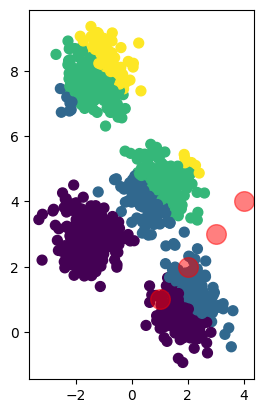

In [29]:
# then we assign each datapoint to it's closest centroid
# this is done by using the argmin function of numpy
# which returns the index of the minimum value in an array
y = np.argmin(distances, axis=1)
print(y, y.shape)
# the output of this algorithm is an array of indices
# each index corresponds to the index of the closest centroid
# for each datapoint
# we can use this array to plot the datapoints and color them
# according to their cluster
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.scatter(X[:, 0], X[:, 1], s=50, c=y)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()
# notice how the color is based on the newly created array y

In [ ]:

# Assign each datapoint to closest centroid
# Calculate the distance between each datapoint and each centroid
# and assign the datapoint to the closest centroid
# This is the E-step of the algorithm
distances = np.zeros((X.shape[0], centroids.shape[0]))
for i in range(centroids.shape[0]):
    distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)

# Assign each datapoint to the closest centroid
# This is the M-step of the algorithm
y = np.argmin(distances, axis=1)

# Update centroids
# Calculate the mean of each cluster and assign it as the new centroid
# This is the M-step of the algorithm
for i in range(centroids.shape[0]):
    centroids[i] = np.mean(X[y == i], axis=0)

# Repeat until convergence
# Repeat the E-step and M-step until the centroids don't change
# This is the convergence step of the algorithm
# This is the full implementation of the K-Means algorithm
while True:
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    y = np.argmin(distances, axis=1)
    for i in range(centroids.shape[0]):
        centroids[i] = np.mean(X[y == i], axis=0)
    if np.allclose(centroids, old_centroids):
        break
    old_centroids = centroids.copy()

# K-Means algorithm
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
